# Correlation of all RNA across regions

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scanpy as sc
import decoupler as dc
import os
from pathlib import Path
import numpy as np
from scipy.stats import pearsonr
rcParams["font.family"] = "Ubuntu Mono"

In [2]:
os.chdir("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/")
os.chdir("other_celltypes")
figure_dir = "/tscc/projects/ps-epigen/users/biy022/biccn/analysis/final_figures/RNA_corr/"
file_dir = "/tscc/projects/ps-epigen/users/biy022/biccn/analysis/final_files/RNA_corr_tables/"

In [3]:
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]
def generate_corr_matrix(cell_type_name):
    rna_object = sc.read_h5ad(f"{cell_type_name}_rna_matrix.h5ad")
    rna_counts = rna_object
    if rna_object.raw != None:
        rna_counts = rna_object.raw.to_adata()
    rna_region_counts = dc.get_pseudobulk(
        adata=rna_counts,
        sample_col="Region",
        groups_col=None,
        min_cells=0,
        min_counts=0,
        min_prop=0.0,
        min_smpls=0,
        remove_empty=True,
        mode="sum"
    )
    sc.pp.normalize_total(rna_region_counts, target_sum=1e6)
    sc.pp.log1p(rna_region_counts, base=2)

    result_matrix = np.zeros((len(region_align), len(region_align)))
    result_df = pd.DataFrame(result_matrix, index=region_align, columns=region_align)

    for i in range(0, len(region_align)):
        for j in range(i, len(region_align)):
            region_x = region_align[i]
            region_y = region_align[j]
            rna_x = rna_region_counts[region_x, :].X[0]
            rna_y = rna_region_counts[region_y, :].X[0]
            result_df.loc[region_x, region_y] = pearsonr(rna_x, rna_y)[0]
            result_df.loc[region_y, region_x] = pearsonr(rna_x, rna_y)[0]

    sns.heatmap(result_df, vmin=0.95, vmax=1.0)
    plt.savefig(Path(figure_dir) / f"{cell_type_name}-RNA_corr.pdf", dpi=250)
    result_df.to_csv(Path(file_dir) / f"{cell_type_name}-RNA_corr.tsv", sep="\t", header=True, index=True)

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


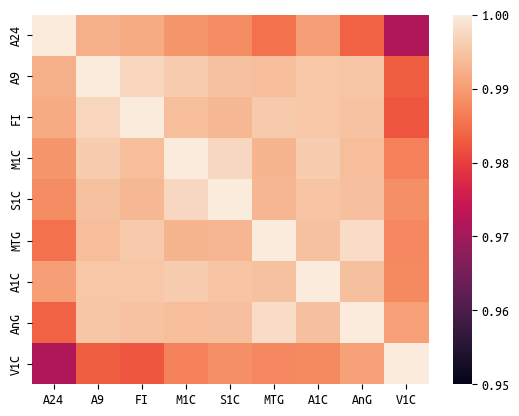

In [4]:
generate_corr_matrix("L4_IT")

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


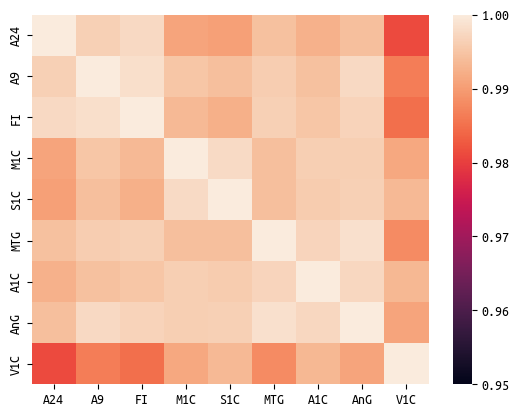

In [5]:
generate_corr_matrix("L2_3_IT")

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


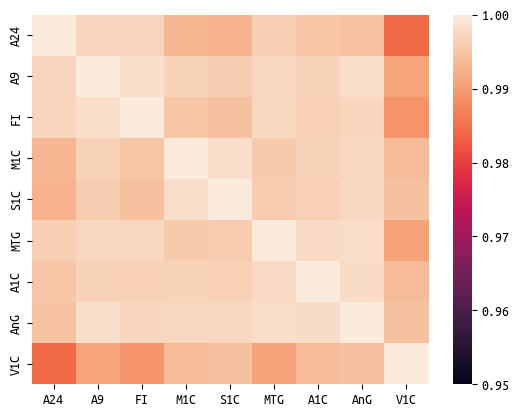

In [6]:
generate_corr_matrix("L5_IT")

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


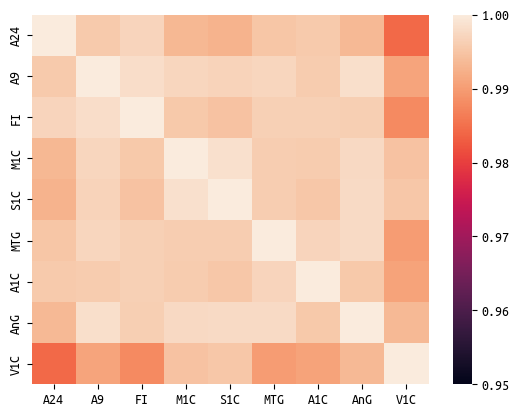

In [7]:
generate_corr_matrix("L6_IT")

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


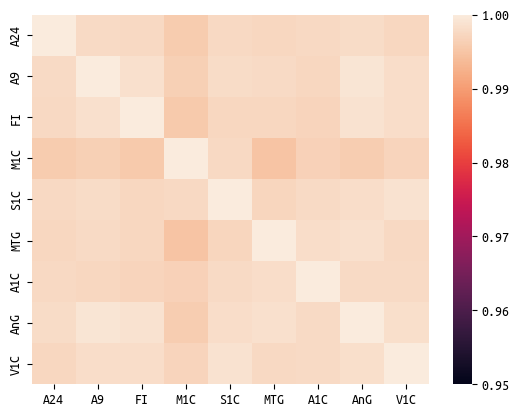

In [8]:
generate_corr_matrix("Oligo")

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


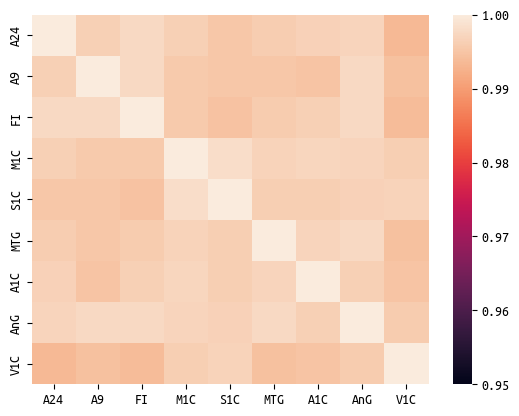

In [9]:
generate_corr_matrix("Astro")

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


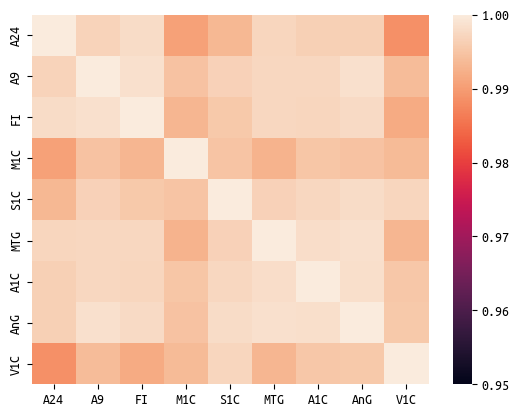

In [10]:
generate_corr_matrix("PVALB")